In [8]:
import matplotlib as plt
import numpy as np
import pandas as pd
from system import *
%matplotlib inline

In [9]:
# importing sag a data

sagAdat = pd.read_excel("SagittariusA_data.xlsx")

# puting the data in a more usable form
sagAdat["q(m)"] = sagAdat["q (AU)"]*1.496e11 # Converting from 'AU' to 'm'
sagAdat["z"] = sagAdat["q(m)"]*np.sin(sagAdat["i (°)"]*np.pi/180) # Finding 'z' position at perihelion 
                                                                  # in cartesian coords
sagAdat["x"] = sagAdat["q(m)"]*np.cos(sagAdat["i (°)"]*np.pi/180)
sagAdat["v(m/s)"] = sagAdat["v (%c)"]*0.01*3e8 # converting star speed to m/s

In [10]:
# Initializing a list of star objects using the information from the dataset 
# Excluding last 3 stars due to their relativistic motion

st_list = []
for i in range(len(sagAdat["q(m)"])-3):
# for i in range(1):

    st_list.append(star([sagAdat["x"][i],0,sagAdat["z"][i]],[0,sagAdat["v(m/s)"][i],0]))

In [11]:
M = 2e30*4e6 # mass of Sag A
tf = 365*24*3600*400 # running for 400 years (in seconds)
dt = 365*24*3600/100 # Iterating 100 times per year

test_system = system3d(st_list,M)

test_system.iterate(tf,dt)

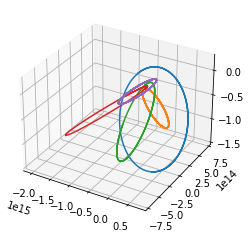

In [12]:
# Testing iteration function
# fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(st_list)):
    ax.plot(st_list[i].r[:,0],st_list[i].r[:,1],st_list[i].r[:,2])
# st_list[0].r[:,0]

# plt.plot(st_list[0].r[:,0],st_list[0].r[:,1])

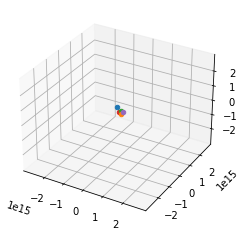

KeyboardInterrupt: 

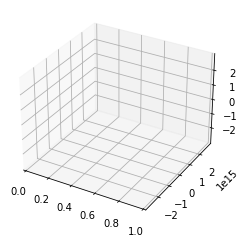

In [17]:
# plotting the 3D model
tbnd = 2 * 1.496e15 # making plot boundaries

test_system.plot([-tbnd,tbnd],[-tbnd,tbnd],[-tbnd,tbnd], tf, dt) # Still can't get the bounds right... 